# Jedha data 'speed dating' project

Purpose : To practice Pandas, Matplotlib and Seaborn libraries on dataset 'speed dating' from Kaggle : 
https://www.kaggle.com/annavictoria/speed-dating-experiment

We will try to understand which criterias improve the chance to get a date during a speed dating event.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
speed_dating = pd.read_csv("Speed Dating Data.csv", encoding='ISO-8859-1')

In [3]:
speed_dating.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


## Personnal information analysis

Let's firstly look at information given by participants. As the dataset is one line by meeting, we firstly extract information for each 'iid' line :

In [4]:
features_perso = ['iid', 'gender', 'idg', 'age', 'field', 'field_cd', 'race', 'imprace', 'imprelig', 'from', 'zipcode', 'goal', 'date', 'go_out', 'career', 'career_c', 'exphappy', 'expnum', 'attr1_1', 'attr4_1', 'attr2_1', 'attr3_1', 'attr5_1']
# as attractivity is the main feature for decision, we only take it (among sinc, intel, etc) due to lack of time

speed_dating[features_perso].head()

,iid,gender,idg,age,field,field_cd,race,imprace,imprelig,from,...,go_out,career,career_c,exphappy,expnum,attr1_1,attr4_1,attr2_1,attr3_1,attr5_1
0,1,0,1,21.0,Law,1.0,4.0,2.0,4.0,Chicago,...,1.0,lawyer,NaN,3.0,2.0,15.0,NaN,35.0,6.0,NaN
1,1,0,1,21.0,Law,1.0,4.0,2.0,4.0,Chicago,...,1.0,lawyer,NaN,3.0,2.0,15.0,NaN,35.0,6.0,NaN
2,1,0,1,21.0,Law,1.0,4.0,2.0,4.0,Chicago,...,1.0,lawyer,NaN,3.0,2.0,15.0,NaN,35.0,6.0,NaN
3,1,0,1,21.0,Law,1.0,4.0,2.0,4.0,Chicago,...,1.0,lawyer,NaN,3.0,2.0,15.0,NaN,35.0,6.0,NaN
4,1,0,1,21.0,Law,1.0,4.0,2.0,4.0,Chicago,...,1.0,lawyer,NaN,3.0,2.0,15.0,NaN,35.0,6.0,NaN


In [5]:
sd_group_iid = speed_dating[features_perso].groupby('iid').mean().reset_index()

### Importance of common religion (mark from 0 to 10)

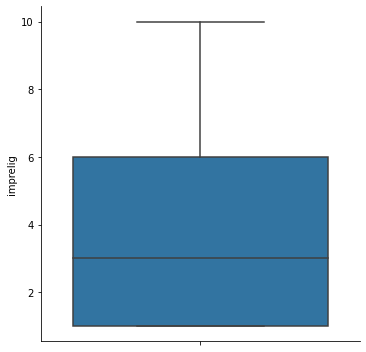

In [61]:
ax = sns.catplot( y = 'imprelig', kind= 'box', data = sd_group_iid)
plt.show()

Religion doesn't seem to have a great importance among this population's sample, as 75% of them put a mark lower than 6. Let's look at the 'race' feature.

### Importance of common 'race' (mark from 0 to 10)

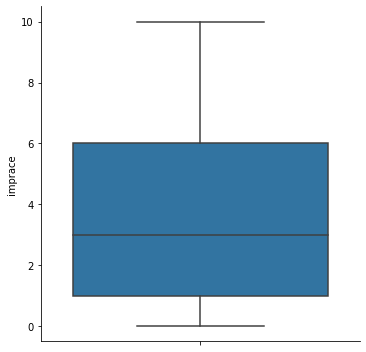

In [7]:
sns.catplot( y = 'imprace', kind= 'box', data = sd_group_iid)
plt.show()

Same conclusion as religion. Signification on match ?

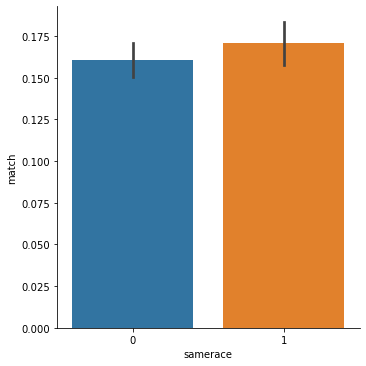

In [8]:
sns.catplot(x = 'samerace', y = 'match', data = speed_dating, kind = 'bar'  )
plt.show()

It firstly appears that a common race makes it a little easier match, but given the confidence intervals we can say that it is not really significative.

### Participant global information 

#### Goal
"What is your primary goal in participating in this event ?"

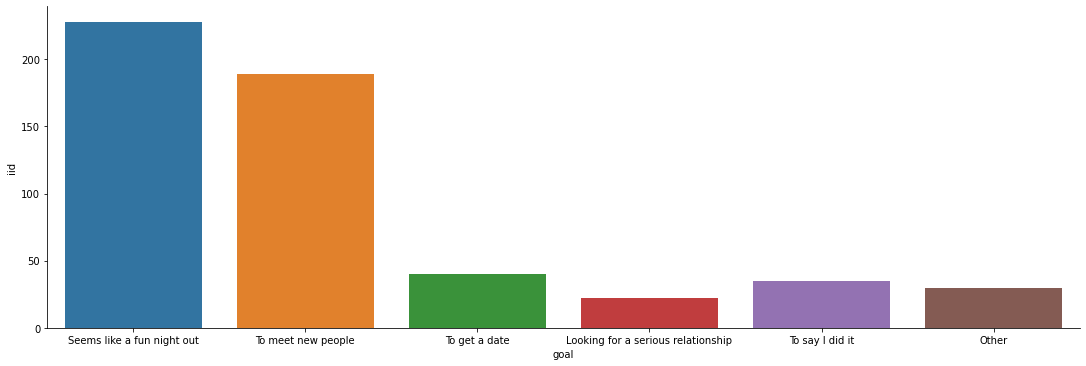

In [9]:
temp_df = sd_group_iid.groupby('goal').count().reset_index()
temp_df.loc[temp_df.goal == 1,['goal']] ='Seems like a fun night out'
temp_df.loc[temp_df.goal == 2,['goal']] ='To meet new people'
temp_df.loc[temp_df.goal == 3,['goal']] ='To get a date'
temp_df.loc[temp_df.goal == 4,['goal']] ='Looking for a serious relationship'
temp_df.loc[temp_df.goal == 5,['goal']] ='To say I did it'
temp_df.loc[temp_df.goal == 6,['goal']] ='Other'

sns.catplot(x = 'goal', y = 'iid', data = temp_df, kind = 'bar', height = 5, aspect = 3  )
plt.show()

Most people said they came here not to find love or even a date, but mostly for fun and meeting new people.

#### Date
"In general, how frequently do you go on dates? "

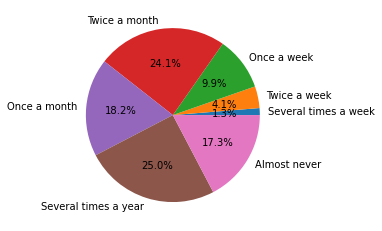

In [10]:
temp_df = sd_group_iid.groupby('date').count().reset_index()
temp_df.loc[temp_df.date == 1,['date']] ='Several times a week'
temp_df.loc[temp_df.date == 2,['date']] ='Twice a week'
temp_df.loc[temp_df.date == 3,['date']] ='Once a week'
temp_df.loc[temp_df.date == 4,['date']] ='Twice a month'
temp_df.loc[temp_df.date == 5,['date']] ='Once a month'
temp_df.loc[temp_df.date == 6,['date']] ='Several times a year'
temp_df.loc[temp_df.date == 7,['date']] ='Almost never'

plt.pie(x = temp_df.iid, labels = temp_df.date, autopct = '%1.1f%%')
plt.show()

#### Go out
"How often do you go out (not necessarily on dates)?"

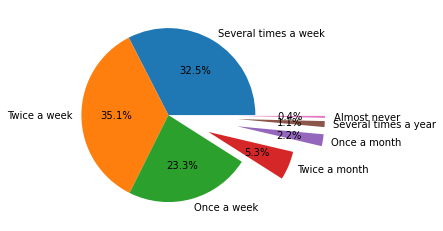

In [11]:
temp_df = sd_group_iid.groupby('go_out').count().reset_index()
temp_df.loc[temp_df.go_out == 1,['go_out']] ='Several times a week'
temp_df.loc[temp_df.go_out == 2,['go_out']] ='Twice a week'
temp_df.loc[temp_df.go_out == 3,['go_out']] ='Once a week'
temp_df.loc[temp_df.go_out == 4,['go_out']] ='Twice a month'
temp_df.loc[temp_df.go_out == 5,['go_out']] ='Once a month'
temp_df.loc[temp_df.go_out == 6,['go_out']] ='Several times a year'
temp_df.loc[temp_df.go_out == 7,['go_out']] ='Almost never'


explode = (0,0,0,0.5,0.8,0.8,0.8)
plt.pie(x = temp_df.iid, labels = temp_df.go_out, autopct = '%1.1f%%', explode = explode)
plt.show()

#### Happiness expectation
"Overall, on a scale of 1-10, how happy do you expect to be with the people you meet during the speed-dating event?"


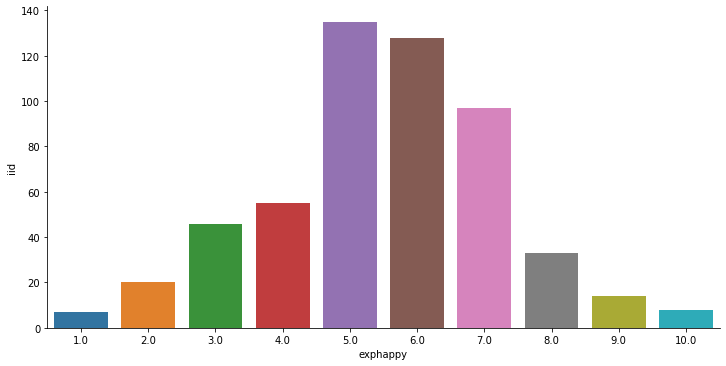

In [12]:
sns.catplot(x = 'exphappy', y = 'iid', data = sd_group_iid.groupby('exphappy').count().reset_index(), kind = 'bar', height = 5, aspect = 2    )
plt.show()

Most people are between 5 and 7 so a little enthousiast about the event, but not so much.

#### Number of intersted persons expected
"Out of the 20 people you will meet, how many do you expect will be interested in dating you? "

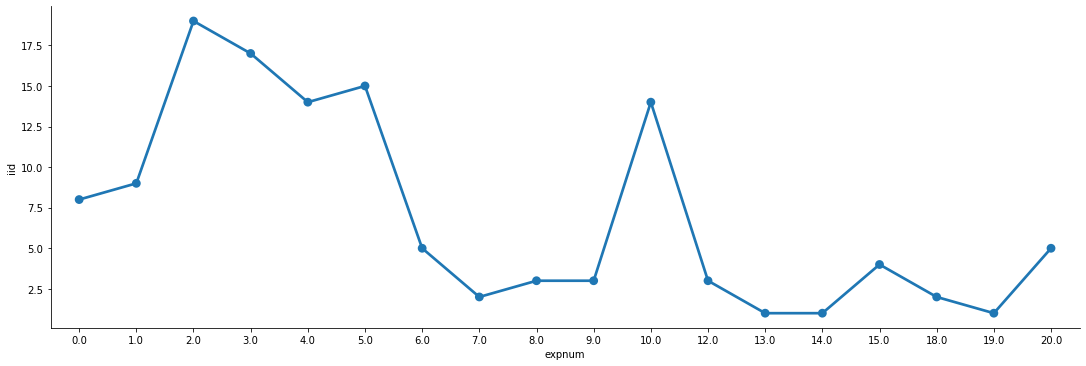

In [13]:
sns.catplot(x = 'expnum', y = 'iid', data = sd_group_iid.groupby('expnum').count().reset_index(), kind = 'point', height = 5, aspect = 3)
plt.show()

Most people think that less than 6 persons over 20 will be interested in them. We also see a peak at "10" : around 15 persons think they will please to half the people they will meet !

<b>Could be interesting to look if confident persons are more likely to please other people :</b>

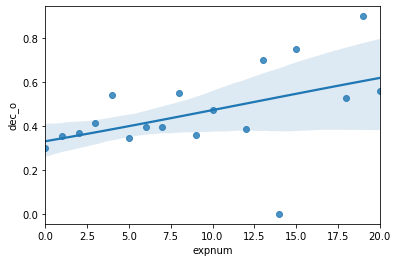

In [14]:
sns.regplot(x = speed_dating.groupby('expnum').count().reset_index().expnum, y = speed_dating.groupby('expnum').mean().reset_index().dec_o,  logistic = True)
plt.show()

If we delete the outlier at 'expnum' = 14, we see that the regression is pretty good. Confident people (who expected higher person number to be interested in them) are the persons who gets more interest.
It is also interesting to note that the slope of the line is less important that the expactations :
- people who expected to not please to anyone finally please to 30% of the people they meet
- people who expected to please to everyone only please to 50% of the people they meet

=> Chances to please is increased with "high expectations" but does not grow as fast.

It is also important not to forget that the size of population taken into account in each point is very little here (particularly for high expnum values), as we can see in the previous figure. For example, expnum = 13 or 14 only count one person, so the average value is not really representative.

## Matching chances observation

We already saw some explicative information for match explanation in the first part. Let's keep looking at our data to try to explain how to improve the chances of match.

### Correlation matrix

Firstly let's see if we quickly identify some datas correlated with 'Match' in order to focus on them :

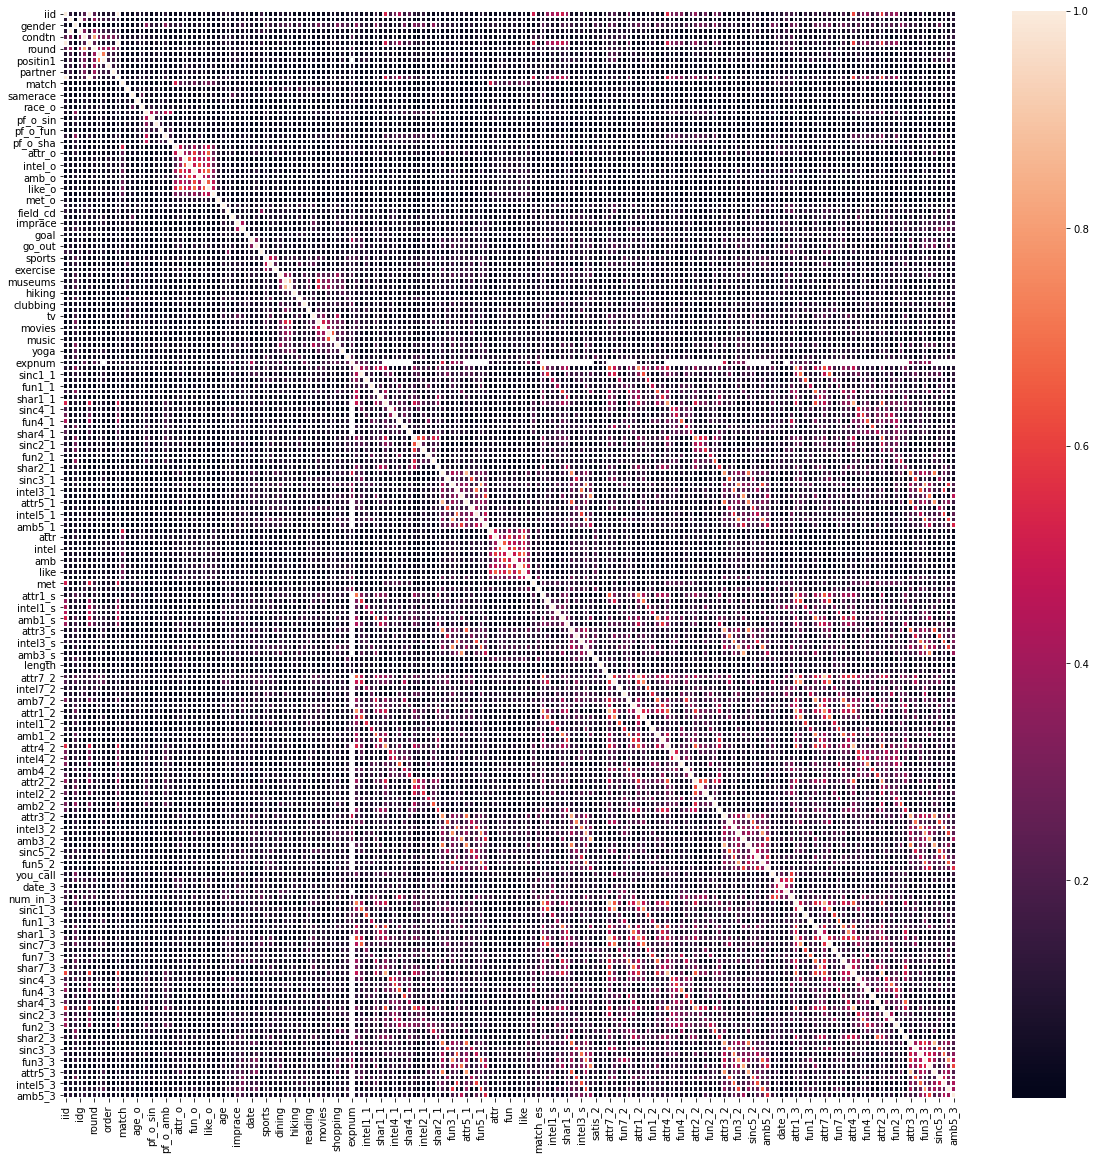

In [40]:
corr = speed_dating.corr()
corr = corr.apply(lambda x : (x**2)**(1/2)) # Here we pass the absolute value to get values from 0 to 1, in order to easily sort them later

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, linewidths=1)
plt.show()

... pretty impossible to read as we have 195 columns. Let's focus on Matches :

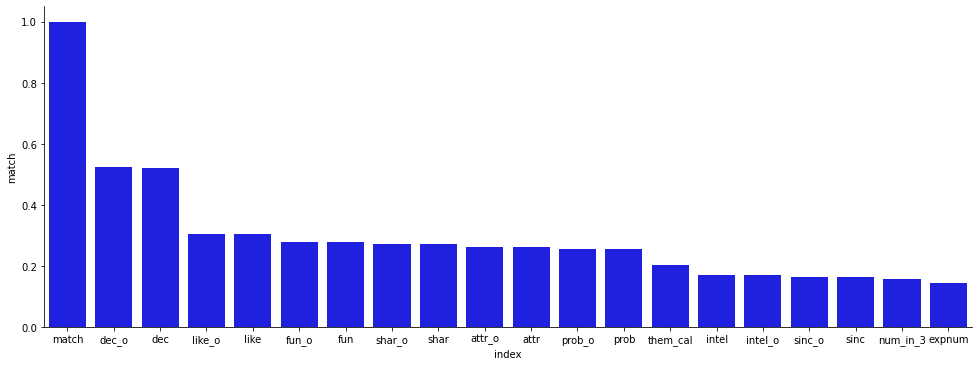

In [41]:
sns.catplot(x= 'index', y= 'match', data = corr['match'].sort_values(ascending = False).iloc[0:20].reset_index(), kind = 'bar', height = 5, aspect = 2.7, color = 'b')
plt.show()

'Match' happens when 'dec'= 1 and 'dec_o'=1 (reminder : dec equals 0 if the person is nok for a second date and 1 if he/she is ok; dec_o is the same idea but from the perspective of the other person).
- It seems logic that match is mainly correlated with itself, then dec_o and dec, then like_o and like (grade from 0 to 10).
- Then we can observe the list of qualities seen in the partner : fun, shar, attr
- prob_o and prob appears after (grade from 0 to 10 to estimate probability for the partner to say yes)
- them_call represents the number of partners who contacted the person to ask for a date after the event
- intelligence and sincerity come after (we can point that those qualities seem less essentials for a match thant fun, attractivity and share of same interests)
- num_in_3 is the number of dates the person had after the event
- then comes 'expnum' that we already saw in part 1

In order to better understand how the partner can make the decision to keep going, let us make the same investigation with 'dec_o' column :

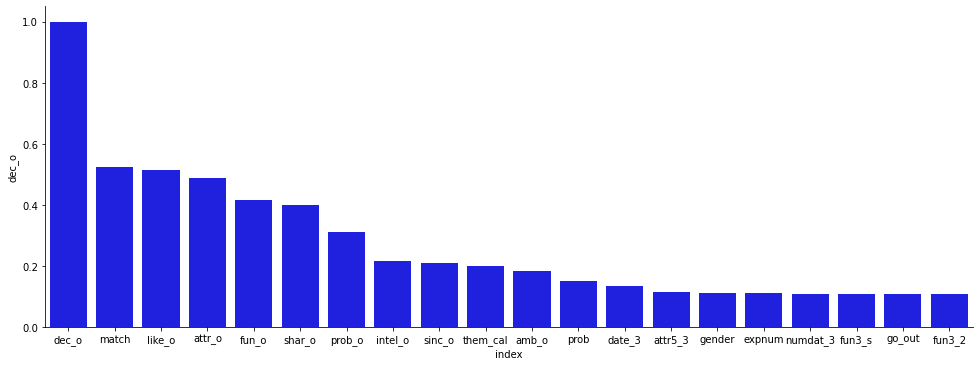

In [42]:
sns.catplot(x= 'index', y= 'dec_o', data = corr['dec_o'].sort_values(ascending = False).iloc[0:20].reset_index(), kind = 'bar', height = 5, aspect = 2.7, color = 'b')
plt.show()

We mostly see the qualities attr_o, fun_o and shar_o. Let's look at the correlation between dec_o and those features.

### Regressions

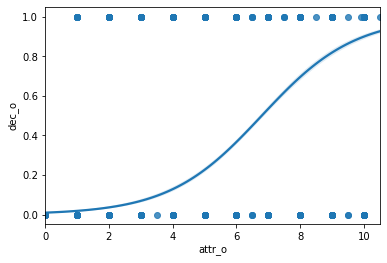

In [44]:
sns.regplot(x = 'attr_o', y = 'dec_o', data = speed_dating, logistic = True)
plt.show()

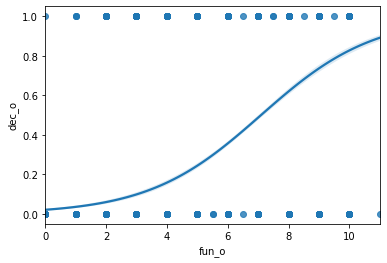

In [43]:
sns.regplot(x = 'fun_o', y = 'dec_o', data = speed_dating, logistic = True)
plt.show()

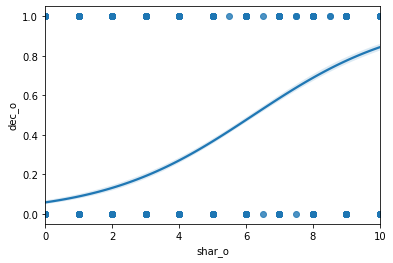

In [45]:
sns.regplot(x = 'shar_o', y = 'dec_o', data = speed_dating, logistic = True)
plt.show()

Attractivity, Fun and Sharing same interests surely helps in partners decision.

We can also look if there is a correlation between attractivity and fun :

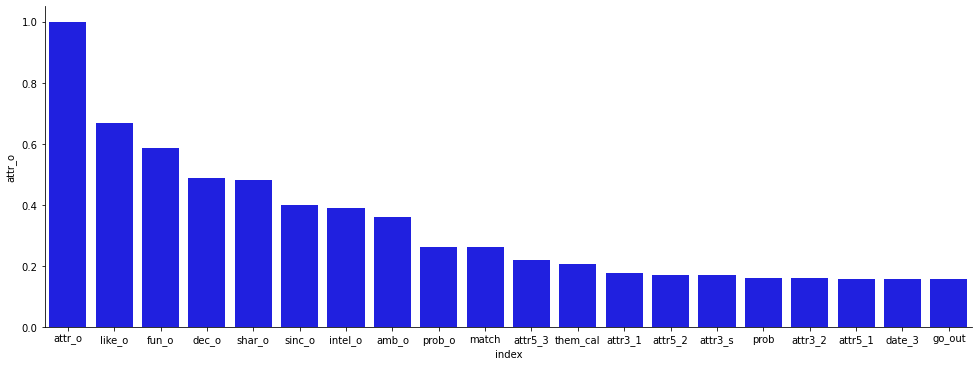

In [46]:
sns.catplot(x= 'index', y= 'attr_o', data = corr['attr_o'].sort_values(ascending = False).iloc[0:20].reset_index(), kind = 'bar', height = 5, aspect = 2.7, color = 'b')
plt.show()

fun_o is quite correlated with attr_o too ! Let's look deeper how grades are related :

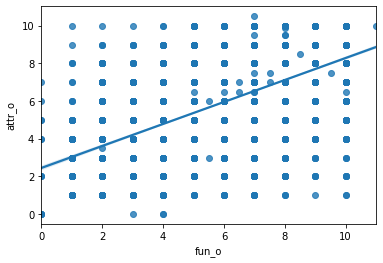

In [62]:
sns.regplot(x = 'fun_o', y = 'attr_o', data = speed_dating)
plt.show()

The line shows the correlation but the numerous points make it difficult to interpret.

Let's try with a new df when we take the 'fun_o' average for each 'attr_o' grade :

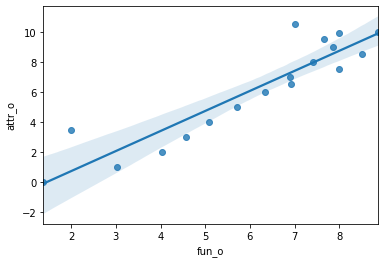

In [63]:
df_temp = speed_dating[['fun_o', 'attr_o']].groupby('attr_o').mean().reset_index()

sns.regplot(x = 'fun_o', y = 'attr_o', data = df_temp)
plt.show()

Far better. From an average point of view, we can say that "fun" and "attractivity" are well correlated.

We could see in a previous graph (bars for attr_o correlation) that attr_o is also correlated to shar_o.

We could perform a 3D interactive graph with plotly, with :
- x = average of fun_o for a given attr_o
- y = average of shar_o for a given attr_o
- z = attr_o

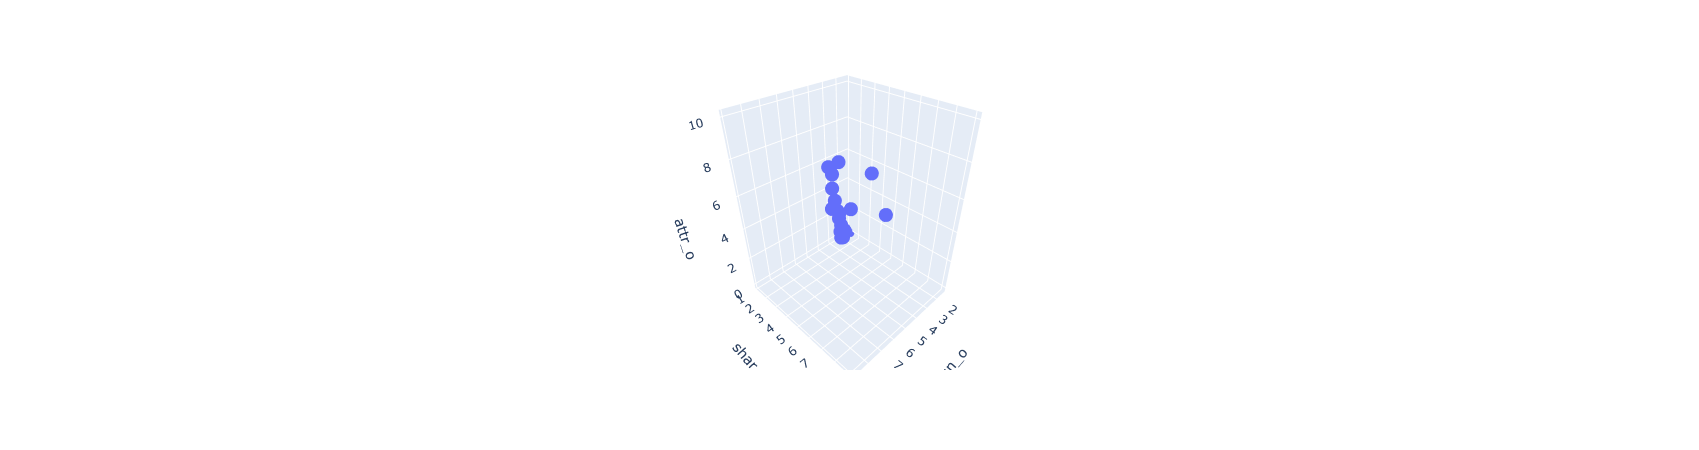

In [66]:
import plotly.express as px

df_temp = speed_dating[['fun_o', 'shar_o', 'attr_o']].groupby('attr_o').mean().reset_index()


fig = px.scatter_3d(df_temp, x='fun_o', y='shar_o', z='attr_o')
fig.show()

The 3 features seem very correlatedto each other. Given the time for the project it's difficult to push the analysis to understand which features causes the others (or if other features explain those 3 together...).

Let us see what happens when we plot the 'like_o' average grade depending on 'fun_o' and 'att_o' :

In [80]:
df_temp = speed_dating[['fun_o', 'attr_o', 'like_o']].groupby(['fun_o', 'attr_o']).mean().reset_index()


fig = px.scatter_3d(df_temp, x='attr_o', y='fun_o', z='like_o')
fig.show()

Like grade increases linearly with attractivity and fun.

## Conclusion

Based on the data exploration we made, it is hard to answer to the question of improving the chance to match on objective criterions.
Match is due to (definition) coordination of two individuals decision to see each other again, and this decision is highly correlated to perceived quality from the other person, mainly attractivity, fun, and interests shared.

It is interesting to point out that those three perceived qualities seems very correlated (when we look the average), we could look deeper to see if a factor explains the other, or if a good grade in all of those characteristics comes from a good global feeling. We still have a lot to learn from this dataset !